> # Chapter 17. Classification
---




### 1.  Nearest Neighbors 


### 2.  Training and Testing



In [0]:
# HIDDEN
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
plots.style.use('fivethirtyeight')
np.set_printoptions(threshold=50)

+ Data science에서 중요한 task 중 하나는 ___classification (분류)___ 이다.
 - 온라인 결재가 발생했을 때, 정상 결재인가 부정 결재인가?
 - 두 남녀의 정보가 있을 때, 잘 어울리는 쌍인가 그렇지 않은 쌍인가?
 - 환자 진료 정보가 있을 때, 암이 걸렸는가 그렇지 않은가?
 - 유권자가 있을 때, 내게 표를 줄 사람인가 그렇지 않은 사람인가?

> ### Nearest Neighbors
---
+ 가장 비슷한 사례를 참고하여 분류를 한다.
+ 다음 신장병(Chronic kidney disease; CKD) 데이터를 가지고 개념을 이해해 보자.

In [4]:
ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,163,7.7,136,3.8,9.8,32,6900,3.4,yes,no,no,good,no,yes,1
69,70,1.01,3,4,normal,abnormal,notpresent,notpresent,264,87,2.7,130,4,12.5,37,9600,4.1,yes,yes,yes,good,yes,no,1
73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,32,0.9,125,4,10,29,18900,3.5,yes,yes,no,good,yes,no,1
73,80,1.02,2,0,abnormal,abnormal,notpresent,notpresent,253,142,4.6,138,5.8,10.5,33,7200,4.3,yes,yes,yes,good,no,no,1
46,60,1.01,1,0,normal,normal,notpresent,notpresent,163,92,3.3,141,4,9.8,28,14600,3.2,yes,yes,no,good,no,no,1


+ 이 중에서 일부 열만을 standard unit으로 변환하여 가져오자.
 + ``Class``가 0과 1이면 각각 신장병 환자 여부가 ``False``, ``True``임을 뜻한다.

In [5]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'White Blood Cell Count', standard_units(ckd.column('White Blood Cell Count')),
    'Class', ckd.column('Class')
)
ckd

Hemoglobin,Glucose,White Blood Cell Count,Class
-0.865744,-0.221549,-0.569768,1
-1.45745,-0.947597,1.16268,1
-1.00497,3.84123,-1.27558,1
-2.81488,0.396364,0.809777,1
-2.08395,0.643529,0.232293,1
-1.35303,-0.561402,-0.505603,1
-0.413266,2.04928,0.360623,1
-1.28342,-0.947597,3.34429,1
-1.10939,1.87936,-0.409356,1
-1.35303,0.489051,1.96475,1


+ Hemoglobin, Glucose 두 변수의 scattor graph를 Class별로 그려보자.

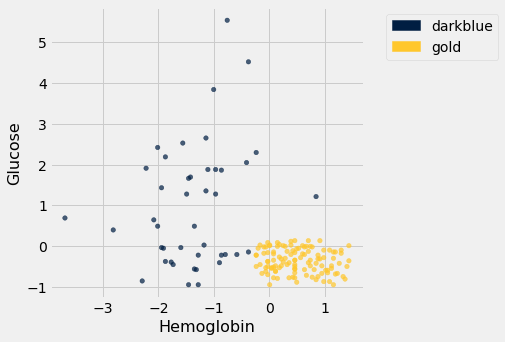

In [6]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd = ckd.join('Class', color_table)

ckd.scatter('Hemoglobin', 'Glucose', colors='Color')

+ 만약 새로운 환자가 Alice가 있고 Glucose, Hemoglobin 측정데이터가 있을 때, 분류 결과를 예측할 수 있을까?
+ Glucose=1.5, Hemoglobin=0 라고 가정해 보자.

In [0]:
def distance(point1, point2):
    """The distance between two arrays of numbers."""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    return training.with_column('Distance', all_distances(training, point))

def closest(training, point, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk


In [0]:
def show_closest(point):
    """point = array([x,y]) 
    gives the coordinates of a new point
    shown in red"""
    
    HemoGl = ckd.drop('White Blood Cell Count', 'Color')
    t = closest(HemoGl, point, 1)
    x_closest = t.row(0).item(1)
    y_closest = t.row(0).item(2)
    ckd.scatter('Hemoglobin', 'Glucose', colors='Color')
    plt.scatter(point.item(0), point.item(1), color='red', s=30)
    plt.plot(make_array(point.item(0), x_closest), make_array(point.item(1), y_closest), color='k', lw=2);

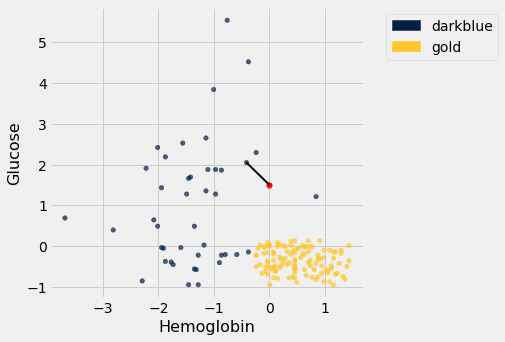

In [9]:
# In this example, Alice's Hemoglobin attribute is 0 and her Glucose is 1.5.
alice = make_array(0, 1.5)
show_closest(alice)

+ 가장 가까운 데이터가 CKD였으므로 Alice도 CKD로 분류하게 된다.
+ Decision Boundary 를 계산해 보자.

In [0]:
def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    """Classify an example with attributes p using k-nearest neighbor classification with the given training table."""
    closestk = closest(training, p, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

def classify_grid(training, test, k):
    c = make_array()
    for i in range(test.num_rows):
        # Run the classifier on the ith patient in the test set
        c = np.append(c, classify(training, make_array(test.row(i)), k))   
    return c

In [0]:
x_array = make_array()
y_array = make_array()
for x in np.arange(-2, 2.1, 0.1):
    for y in np.arange(-2, 2.1, 0.1):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = Table().with_columns(
    'Hemoglobin', x_array,
    'Glucose', y_array
)

c = classify_grid(ckd.drop('White Blood Cell Count', 'Color'), test_grid, 1)

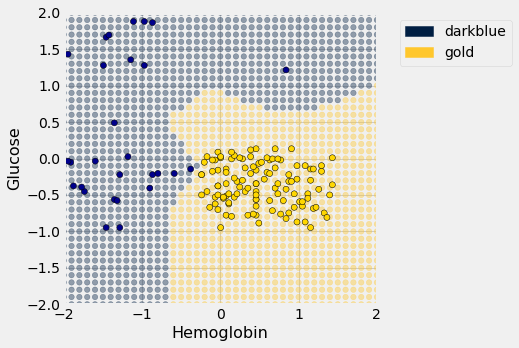

In [12]:
test_grid = test_grid.with_column('Class', c).join('Class', color_table)
test_grid.scatter('Hemoglobin', 'Glucose', colors='Color', alpha=0.4, s=30)

plt.scatter(ckd.column('Hemoglobin'), ckd.column('Glucose'), c=ckd.column('Color'), edgecolor='k')

plt.xlim(-2, 2)
plt.ylim(-2, 2);

> ### Training and Testing
---
+ 분류 결과가 얼마나 좋은지를 어떻게 평가하나?
+ 만약 모든 데이터를 1-NN 분류한다면?
  - 분류 정확도는 100%
  - 이것이 완벽한 분류기를 만들었단 뜻인가?
  
+ Training : 분류 결과를 생성하는 데 사용되는 데이터
+ Test : 분류 성능을 평가하는 데 사용되는 데이터
---
+ 이러한 개념을 토대로 $k$NN classifier를 만들어 보자.
+ 포도 class에 관한 wine 데이터를 사용해 보자.

In [15]:
wine = Table.read_table('wine.csv')

def is_one(x):
    if x == 1:
        return 1
    else:
        return 0
    
wine = wine.with_column('Class', wine.apply(is_one, 0))

wine

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045
1,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


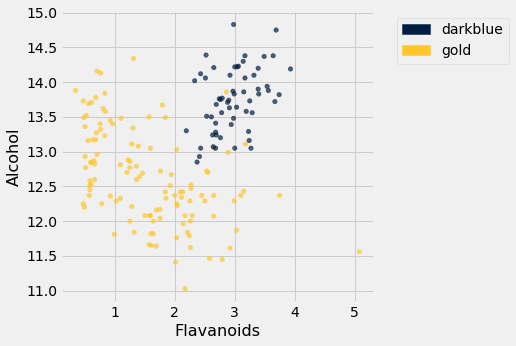

In [16]:
wine_with_colors = wine.join('Class', color_table)
wine_with_colors.scatter('Flavanoids', 'Alcohol', colors='Color')

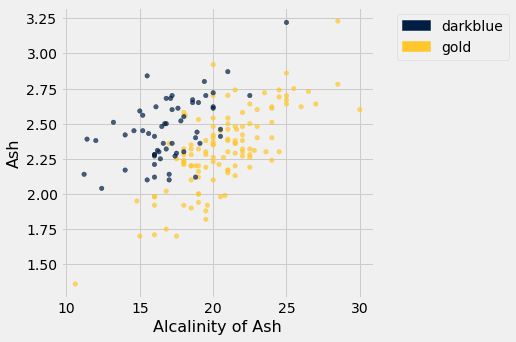

In [17]:
wine_with_colors.scatter('Alcalinity of Ash', 'Ash', colors='Color')

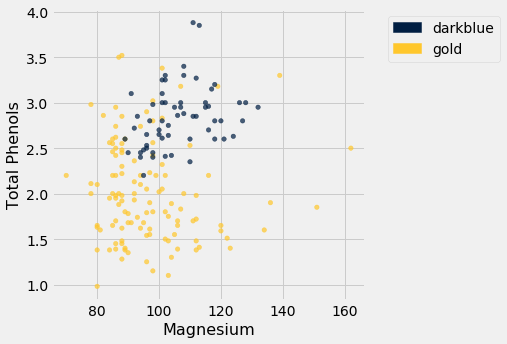

In [18]:
wine_with_colors.scatter('Magnesium', 'Total Phenols', colors='Color')

In [19]:
special_wine = wine.drop('Class').row(0)
classify(wine, special_wine, 5)

1

In [20]:
special_wine = wine.drop('Class').row(177)
classify(wine, special_wine, 5)

0

+ 이제 $k$NN의 성능을 평가해 보자.

In [0]:
shuffled_wine = wine.sample(with_replacement=False) 
training_set = shuffled_wine.take(np.arange(89))
test_set  = shuffled_wine.take(np.arange(89, 178))

In [0]:
def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return count_zero(array1 - array2)

def evaluate_accuracy(training, test, k):
    test_attributes = test.drop('Class')
    def classify_testrow(row):
        return classify(training, row, k)
    c = test_attributes.apply(classify_testrow)
    return count_equal(c, test.column('Class')) / test.num_rows

In [23]:
evaluate_accuracy(training_set, test_set, 5)

0.898876404494382

+ 데이터를 어떻게 Training/Test Data로 나누느냐에 따라 정확도가 달라짐을 잊지 말자.
+ 이러한 정확도를 추정하기 위해서는 앞에서 공부한 바와 같이 empirical distribution을 구하는 게 좋다.

> ### Recap
---

+ Nearest Neighbor (NN)
 - 기존의 가장 유사한 사례의 결과를 참조하여 분류
 - 일반적으로는 $k$NN 이라 부른다.
+ Training and Testing
 - 분류기의 성능을 객관적으로 테스트하기 위해서 데이터를 Training/Test Data로 분리한다.
 - Training data : 분류기를 생성하는 데 사용되는 데이터
 - Test data : 생성된 분류기의 성능을 평가하는 데 사용되는 데이터
